!pip install wordcloud

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mltb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df=pd.read_json("StreamingHistory0.json")
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-07-08 14:36,The Joe Rogan Experience,#1309 - Naval Ravikant,1460182
1,2021-07-09 03:06,The Ranveer Show,"Love, S*x and More - Tips, Secrets & Technique...",87
2,2021-07-09 03:06,The Joe Rogan Experience,#1309 - Naval Ravikant,551535
3,2021-07-09 03:09,The Joe Rogan Experience,#1309 - Naval Ravikant,125946
4,2021-07-09 04:21,The Joe Rogan Experience,#1309 - Naval Ravikant,1296264


In [3]:
df.tail()

,endTime,artistName,trackName,msPlayed
3640,2022-07-08 15:46,Frank Ocean,Novacane,107911
3641,2022-07-08 15:48,2 Chainz,We Own It (Fast & Furious),83168
3642,2022-07-08 15:49,Seeb,Breathe,102371
3643,2022-07-08 15:52,Kanye West,Black Skinhead,170564
3644,2022-07-09 07:26,The Joe Rogan Experience,#1309 - Naval Ravikant,337093


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     3645 non-null   object
 1   artistName  3645 non-null   object
 2   trackName   3645 non-null   object
 3   msPlayed    3645 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 114.0+ KB


In [5]:
df.shape

(3645, 4)

In [6]:
df.ndim

2

In [7]:
df.head(20)

,endTime,artistName,trackName,msPlayed
0,2021-07-08 14:36,The Joe Rogan Experience,#1309 - Naval Ravikant,1460182
1,2021-07-09 03:06,The Ranveer Show,"Love, S*x and More - Tips, Secrets & Technique...",87
2,2021-07-09 03:06,The Joe Rogan Experience,#1309 - Naval Ravikant,551535
3,2021-07-09 03:09,The Joe Rogan Experience,#1309 - Naval Ravikant,125946
4,2021-07-09 04:21,The Joe Rogan Experience,#1309 - Naval Ravikant,1296264
5,2021-07-09 04:58,The Bilz & Kashif,Tere Nainon Mein,27183
6,2021-07-09 04:58,The Joe Rogan Experience,#1309 - Naval Ravikant,2471
7,2021-07-09 05:01,Bobby Caldwell,What You Won't Do for Love,156792
8,2021-07-09 05:02,Kauai45,Just The Two of Us,96460
9,2021-07-09 05:49,XXXTENTACION,bad vibes forever,133637


In [8]:
df.nunique()

endTime       3035
artistName     761
trackName     1484
msPlayed      3070
dtype: int64

In [9]:
len(df["artistName"].unique())

761

In [10]:
df.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [11]:
#verification of to_datetime

nanos = pd.Series([1462282258000000000, 1462282258100000000, 1462282258200000000])
pd.to_datetime(nanos)


0   2016-05-03 13:30:58.000
1   2016-05-03 13:30:58.100
2   2016-05-03 13:30:58.200
dtype: datetime64[ns]

#difference between pd.to_datetime vs pd.DataTimeIndex

In [1]: import pandas as pd

In [3]: nanos = pd.Series([1462282258000000000, 1462282258100000000, 1462282258200000000])

In [4]: pd.to_datetime(nanos)
Out[4]: 
0   2016-05-03 13:30:58.000
1   2016-05-03 13:30:58.100
2   2016-05-03 13:30:58.200
dtype: datetime64[ns]

In [5]: pd.DatetimeIndex(nanos)
Out[5]: 
DatetimeIndex([       '2016-05-03 13:30:58', '2016-05-03 13:30:58.100000',
               '2016-05-03 13:30:58.200000'],
              dtype='datetime64[ns]', freq=None)

In [12]:
df["playTime"]=pd.to_datetime(df["endTime"])
df

,endTime,artistName,trackName,msPlayed,playTime
0,2021-07-08 14:36,The Joe Rogan Experience,#1309 - Naval Ravikant,1460182,2021-07-08 14:36:00
1,2021-07-09 03:06,The Ranveer Show,"Love, S*x and More - Tips, Secrets & Technique...",87,2021-07-09 03:06:00
2,2021-07-09 03:06,The Joe Rogan Experience,#1309 - Naval Ravikant,551535,2021-07-09 03:06:00
3,2021-07-09 03:09,The Joe Rogan Experience,#1309 - Naval Ravikant,125946,2021-07-09 03:09:00
4,2021-07-09 04:21,The Joe Rogan Experience,#1309 - Naval Ravikant,1296264,2021-07-09 04:21:00
...,...,...,...,...,...
3640,2022-07-08 15:46,Frank Ocean,Novacane,107911,2022-07-08 15:46:00
3641,2022-07-08 15:48,2 Chainz,We Own It (Fast & Furious),83168,2022-07-08 15:48:00
3642,2022-07-08 15:49,Seeb,Breathe,102371,2022-07-08 15:49:00
3643,2022-07-08 15:52,Kanye West,Black Skinhead,170564,2022-07-08 15:52:00


In [13]:
df["year"]=pd.DatetimeIndex(df["playTime"]).year
df["month"]=pd.DatetimeIndex(df["playTime"]).month
df["day"]=pd.DatetimeIndex(df["playTime"]).day
df["weekday"]=pd.DatetimeIndex(df["playTime"]).weekday
df["time"]=pd.DatetimeIndex(df["playTime"]).time
df["hour"]=pd.DatetimeIndex(df["playTime"]).hour
df["day-name"]=df["playTime"].apply(lambda x: x.day_name())
df["Count"]=1

In [14]:
df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(df["msPlayed"], unit='ms')

Here we used the `to_timedelta` module to obatin the information regarding the time frame of the song played in milli-seconds.

We also converted the information given in milli-seconds into proper format and added it into another column called `Time-Played (hh-mm-ss)`.

* For more info (`to_timedelta`) : https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html

a day = 24 hrs = 1440 min =86400 secs

In [15]:
def hour(td):
    return td.seconds/3600 
def minutes(td):
    return(td.seconds//60)%60

df["ListeningTime(Hours)"]=df["Time-Played (hh-mm-ss)"].apply(hour).round(3)
df["ListeningTime(Minutes)"]=df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [16]:
df.head()

,endTime,artistName,trackName,msPlayed,playTime,year,month,day,weekday,time,hour,day-name,Count,Time-Played (hh-mm-ss),ListeningTime(Hours),ListeningTime(Minutes)
0,2021-07-08 14:36,The Joe Rogan Experience,#1309 - Naval Ravikant,1460182,2021-07-08 14:36:00,2021,7,8,3,14:36:00,14,Thursday,1,0 days 00:24:20.182000,0.406,24
1,2021-07-09 03:06,The Ranveer Show,"Love, S*x and More - Tips, Secrets & Technique...",87,2021-07-09 03:06:00,2021,7,9,4,03:06:00,3,Friday,1,0 days 00:00:00.087000,0.000,0
2,2021-07-09 03:06,The Joe Rogan Experience,#1309 - Naval Ravikant,551535,2021-07-09 03:06:00,2021,7,9,4,03:06:00,3,Friday,1,0 days 00:09:11.535000,0.153,9
3,2021-07-09 03:09,The Joe Rogan Experience,#1309 - Naval Ravikant,125946,2021-07-09 03:09:00,2021,7,9,4,03:09:00,3,Friday,1,0 days 00:02:05.946000,0.035,2
4,2021-07-09 04:21,The Joe Rogan Experience,#1309 - Naval Ravikant,1296264,2021-07-09 04:21:00,2021,7,9,4,04:21:00,4,Friday,1,0 days 00:21:36.264000,0.360,21


In [17]:
df.describe()

,msPlayed,year,month,day,weekday,hour,Count,Time-Played (hh-mm-ss),ListeningTime(Hours),ListeningTime(Minutes)
count,3.645000e+03,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.0,3645,3645.000000,3645.000000
mean,1.569133e+05,2021.489712,6.260631,15.999177,3.139369,11.246365,1.0,0 days 00:02:36.913339094,0.043446,2.176132
std,2.053535e+05,0.499963,2.948255,8.374059,1.984517,4.975703,0.0,0 days 00:03:25.353451029,0.057045,3.221298
min,0.000000e+00,2021.000000,1.000000,1.000000,0.000000,0.000000,1.0,0 days 00:00:00,0.000000,0.000000
25%,3.693500e+04,2021.000000,4.000000,9.000000,1.000000,7.000000,1.0,0 days 00:00:36.935000,0.010000,0.000000
50%,1.453440e+05,2021.000000,7.000000,15.000000,3.000000,12.000000,1.0,0 days 00:02:25.344000,0.040000,2.000000
75%,2.141330e+05,2022.000000,8.000000,24.000000,5.000000,15.000000,1.0,0 days 00:03:34.133000,0.059000,3.000000
max,3.833620e+06,2022.000000,12.000000,31.000000,6.000000,23.000000,1.0,0 days 01:03:53.620000,1.065000,58.000000


In [18]:
df.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed', 'playTime', 'year',
       'month', 'day', 'weekday', 'time', 'hour', 'day-name', 'Count',
       'Time-Played (hh-mm-ss)', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

In [19]:
df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

In [20]:
df

,artistName,trackName,playTime,year,month,day,weekday,time,hour,day-name,Count,ListeningTime(Hours),ListeningTime(Minutes)
0,The Joe Rogan Experience,#1309 - Naval Ravikant,2021-07-08 14:36:00,2021,7,8,3,14:36:00,14,Thursday,1,0.406,24
1,The Ranveer Show,"Love, S*x and More - Tips, Secrets & Technique...",2021-07-09 03:06:00,2021,7,9,4,03:06:00,3,Friday,1,0.000,0
2,The Joe Rogan Experience,#1309 - Naval Ravikant,2021-07-09 03:06:00,2021,7,9,4,03:06:00,3,Friday,1,0.153,9
3,The Joe Rogan Experience,#1309 - Naval Ravikant,2021-07-09 03:09:00,2021,7,9,4,03:09:00,3,Friday,1,0.035,2
4,The Joe Rogan Experience,#1309 - Naval Ravikant,2021-07-09 04:21:00,2021,7,9,4,04:21:00,4,Friday,1,0.360,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,Frank Ocean,Novacane,2022-07-08 15:46:00,2022,7,8,4,15:46:00,15,Friday,1,0.030,1
3641,2 Chainz,We Own It (Fast & Furious),2022-07-08 15:48:00,2022,7,8,4,15:48:00,15,Friday,1,0.023,1
3642,Seeb,Breathe,2022-07-08 15:49:00,2022,7,8,4,15:49:00,15,Friday,1,0.028,1
3643,Kanye West,Black Skinhead,2022-07-08 15:52:00,2022,7,8,4,15:52:00,15,Friday,1,0.047,2


# Exploratory Analysis & Visualization

In [21]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

mltb.rcParams['font.size']=14
mltb.rcParams['figure.figsize']=(9,5)
mltb.rcParams['figure.facecolor']= '#00000000'

In [22]:
df.columns

Index(['artistName', 'trackName', 'playTime', 'year', 'month', 'day',
       'weekday', 'time', 'hour', 'day-name', 'Count', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

In [23]:
unique_artists=df["artistName"].nunique()
unique_artists

761

In [24]:
total_artists= df["artistName"].count
total_artists

<bound method Series.count of 0       The Joe Rogan Experience
1               The Ranveer Show
2       The Joe Rogan Experience
3       The Joe Rogan Experience
4       The Joe Rogan Experience
                  ...           
3640                 Frank Ocean
3641                    2 Chainz
3642                        Seeb
3643                  Kanye West
3644    The Joe Rogan Experience
Name: artistName, Length: 3645, dtype: object>

In [25]:
unique_artists = df["artistName"].nunique() 
total_artists = df["artistName"].count() 
unique_artist_percentage = unique_artists/total_artists*100 
unique_artist_percentage

20.877914951989027

In [26]:
unique_artists_list=np.array([unique_artists,total_artists-unique_artists])
unique_artists_list


array([ 761, 2884])

In [27]:
unique_artists_labels=["Unique Artists","Non-Unique Artists"]

In [28]:
import matplotlib.colors as mcolors

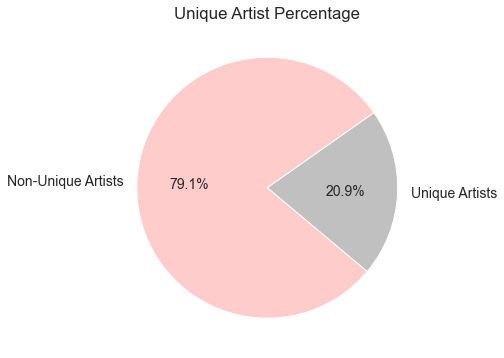

In [29]:
fig, ax=plt.subplots(figsize=(10,6))
ax.pie(unique_artists_list,labels=unique_artists_labels,autopct='%1.1f%%',startangle=320,colors = ['#C0C0C0','#FFCCCC'])
plt.title("Unique Artist Percentage");

In [30]:
top_10_artists=df.groupby(["artistName"])[['ListeningTime(Hours)','ListeningTime(Minutes)','Count']].sum().sort_values(by='ListeningTime(Minutes)',ascending=False)
top_10_artists.head(11)

,ListeningTime(Hours),ListeningTime(Minutes),Count
artistName,,,
A.R. Rahman,9.455,508,108
The Joe Rogan Experience,7.696,386,33
Amit Trivedi,5.977,321,93
Cigarettes After Sex,5.845,302,101
Amrita Kaur & Yadvinder Singh,3.989,231,32
Kyle Olthoff,4.249,220,116
Ali Sethi,3.192,173,59
Anuv Jain,2.840,143,54
Alan Walker,2.634,132,73


In [31]:
#artists least listened to

top_10_artists.tail(11)

,ListeningTime(Hours),ListeningTime(Minutes),Count
artistName,,,
Taba Chake,0.003,0,1
Steppenwolf,0.014,0,1
KSW,0.010,0,1
Sunidhi Chauhan,0.000,0,1
Sunlike Brothers,0.001,0,1
Davie,0.009,0,1
David Bowie,0.001,0,2
HELLSTRVCK,0.004,0,1
TELYKast,0.008,0,1


In [32]:
df.columns

Index(['artistName', 'trackName', 'playTime', 'year', 'month', 'day',
       'weekday', 'time', 'hour', 'day-name', 'Count', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

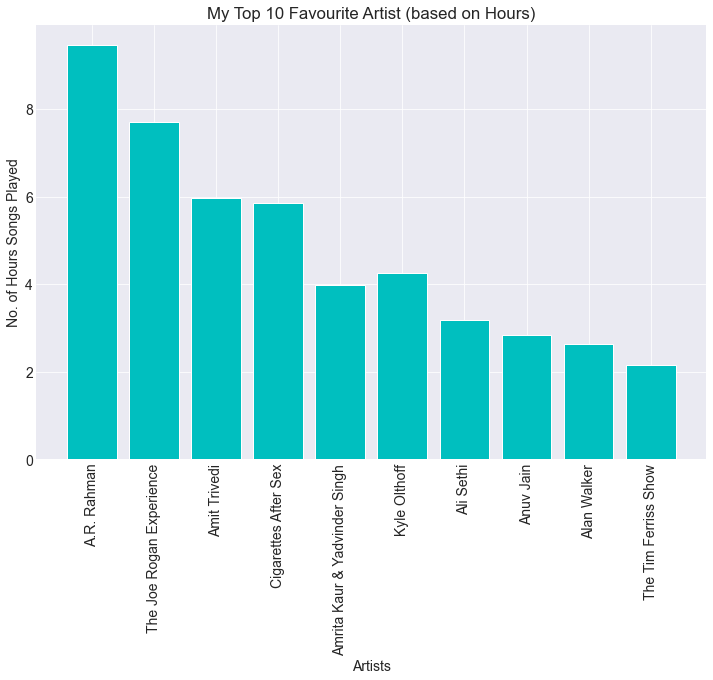

In [33]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artists.head(10).index,top_10_artists["ListeningTime(Hours)"].head(10),color='c')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=90);

In [34]:
top_10_artists=df.groupby(["artistName"])[['ListeningTime(Hours)','ListeningTime(Minutes)','Count']].sum().sort_values(by='ListeningTime(Hours)',ascending=False)
top_10_artists.head(11)

,ListeningTime(Hours),ListeningTime(Minutes),Count
artistName,,,
A.R. Rahman,9.455,508,108
The Joe Rogan Experience,7.696,386,33
Amit Trivedi,5.977,321,93
Cigarettes After Sex,5.845,302,101
Kyle Olthoff,4.249,220,116
Amrita Kaur & Yadvinder Singh,3.989,231,32
Ali Sethi,3.192,173,59
Anuv Jain,2.840,143,54
Alan Walker,2.634,132,73


In [35]:
top_10_artists_Count=df.groupby(["artistName"])[['ListeningTime(Hours)','ListeningTime(Minutes)','Count']].sum().sort_values(by='Count',ascending=False)
top_10_artists_Count.head(11)

,ListeningTime(Hours),ListeningTime(Minutes),Count
artistName,,,
Kyle Olthoff,4.249,220,116
A.R. Rahman,9.455,508,108
Cigarettes After Sex,5.845,302,101
Amit Trivedi,5.977,321,93
Alan Walker,2.634,132,73
Ali Sethi,3.192,173,59
Naval,1.812,91,54
Anuv Jain,2.840,143,54
Kanye West,1.559,77,43


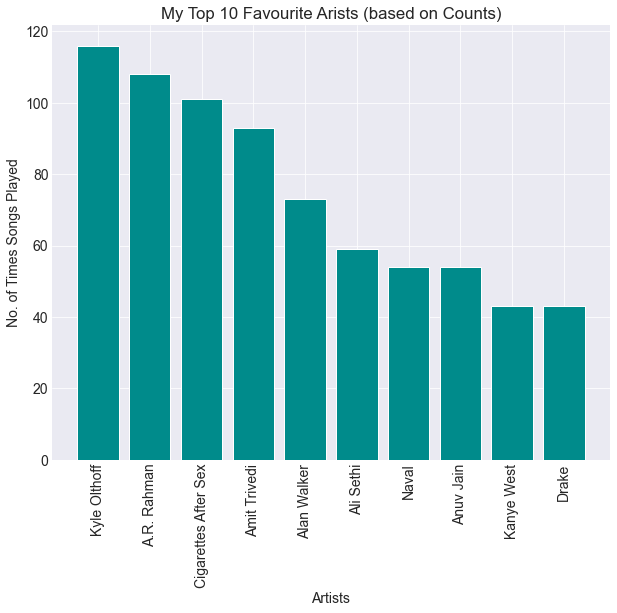

In [36]:
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(top_10_artists_Count.head(10).index,top_10_artists_Count["Count"].head(10),color="darkcyan")
ax.set(title="My Top 10 Favourite Arists (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=90);


# Top 10 fav artists based on count

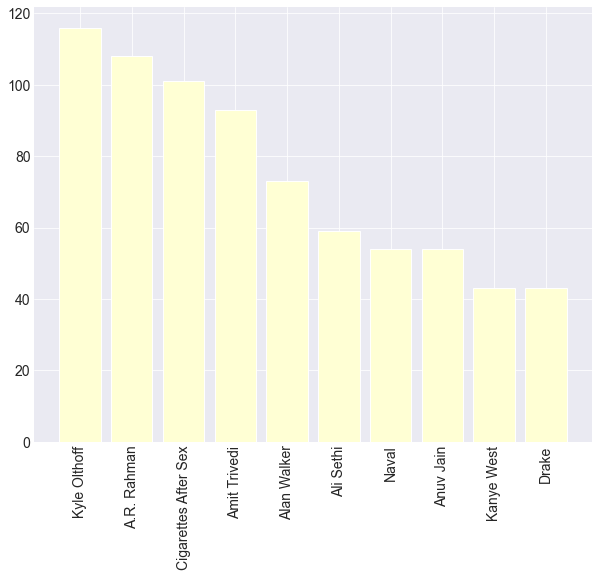

In [37]:
fig, ax=plt.subplots(figsize=(10,8))
ax.bar(top_10_artists_Count.head(10).index,top_10_artists_Count["Count"].head(10),color='xkcd:eggshell')
plt.xticks(rotation=90);

# Song tracks Exploration

In [38]:
df.columns

Index(['artistName', 'trackName', 'playTime', 'year', 'month', 'day',
       'weekday', 'time', 'hour', 'day-name', 'Count', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

In [39]:
#count of unique songs

unique_songs=df["trackName"].nunique()
unique_songs

1484

In [40]:
total_songs=df["trackName"].count()
total_songs

3645

In [41]:
unique_songs_percentage=unique_songs/total_songs*100
unique_songs_percentage

40.71330589849108

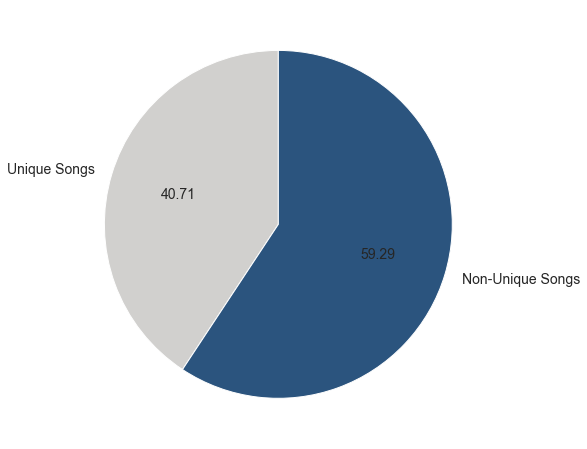

In [42]:
unique_songs_list=np.array([unique_songs,total_songs-unique_songs])
unique_songs_list_label=["Unique Songs","Non-Unique Songs"]
fig,ax=plt.subplots(figsize=(10,8))
ax.pie(unique_songs_list,labels=unique_songs_list_label,autopct='%.2f',colors=["#D1D0CE", "#2B547E"],startangle=90)
plt.title="Unique Songs Percentage";

In [43]:
#count of top 10 songs

top_10_songs_count=df.groupby(["trackName"])[["ListeningTime(Hours)",'ListeningTime(Minutes)','Count']].sum().sort_values(by="Count",ascending=False)
top_10_songs_count.head(10)

,ListeningTime(Hours),ListeningTime(Minutes),Count
trackName,,,
Kun Faya Kun,7.613,413,68
Khabar-E-Tahayyur-E-Ishq,2.589,141,48
Paranoia,1.383,77,44
Namo Namo,3.821,214,43
Sun Lo Na (Raw),1.636,72,38
Lonely Alone,1.295,68,35
Sing Me to Sleep,1.466,80,35
this is how you fall in love,1.184,49,31
The Whale,1.145,56,30


In [44]:
#top 10 songs based on time listened

top_10_songs_time=df.groupby(["trackName"])[["ListeningTime(Hours)",'ListeningTime(Minutes)','Count']].sum().sort_values(by="ListeningTime(Minutes)",ascending=False)
top_10_songs_time.head(10)

,ListeningTime(Hours),ListeningTime(Minutes),Count
trackName,,,
Kun Faya Kun,7.613,413,68
Namo Namo,3.821,214,43
Reham Teri Sukh Paiya,2.508,146,14
Khabar-E-Tahayyur-E-Ishq,2.589,141,48
#1791 - Sadhguru,2.393,140,7
"#542: Chris Dixon and Naval Ravikant — The Wonders of Web3, How to Pick the Right Hill to Climb, Finding the Right Amount of Crypto Regulation, Friends with Benefits, and the Untapped Potential of NFTs",2.147,125,7
#1309 - Naval Ravikant,2.160,124,12
#1609 - Elon Musk,2.456,83,8
Sing Me to Sleep,1.466,80,35


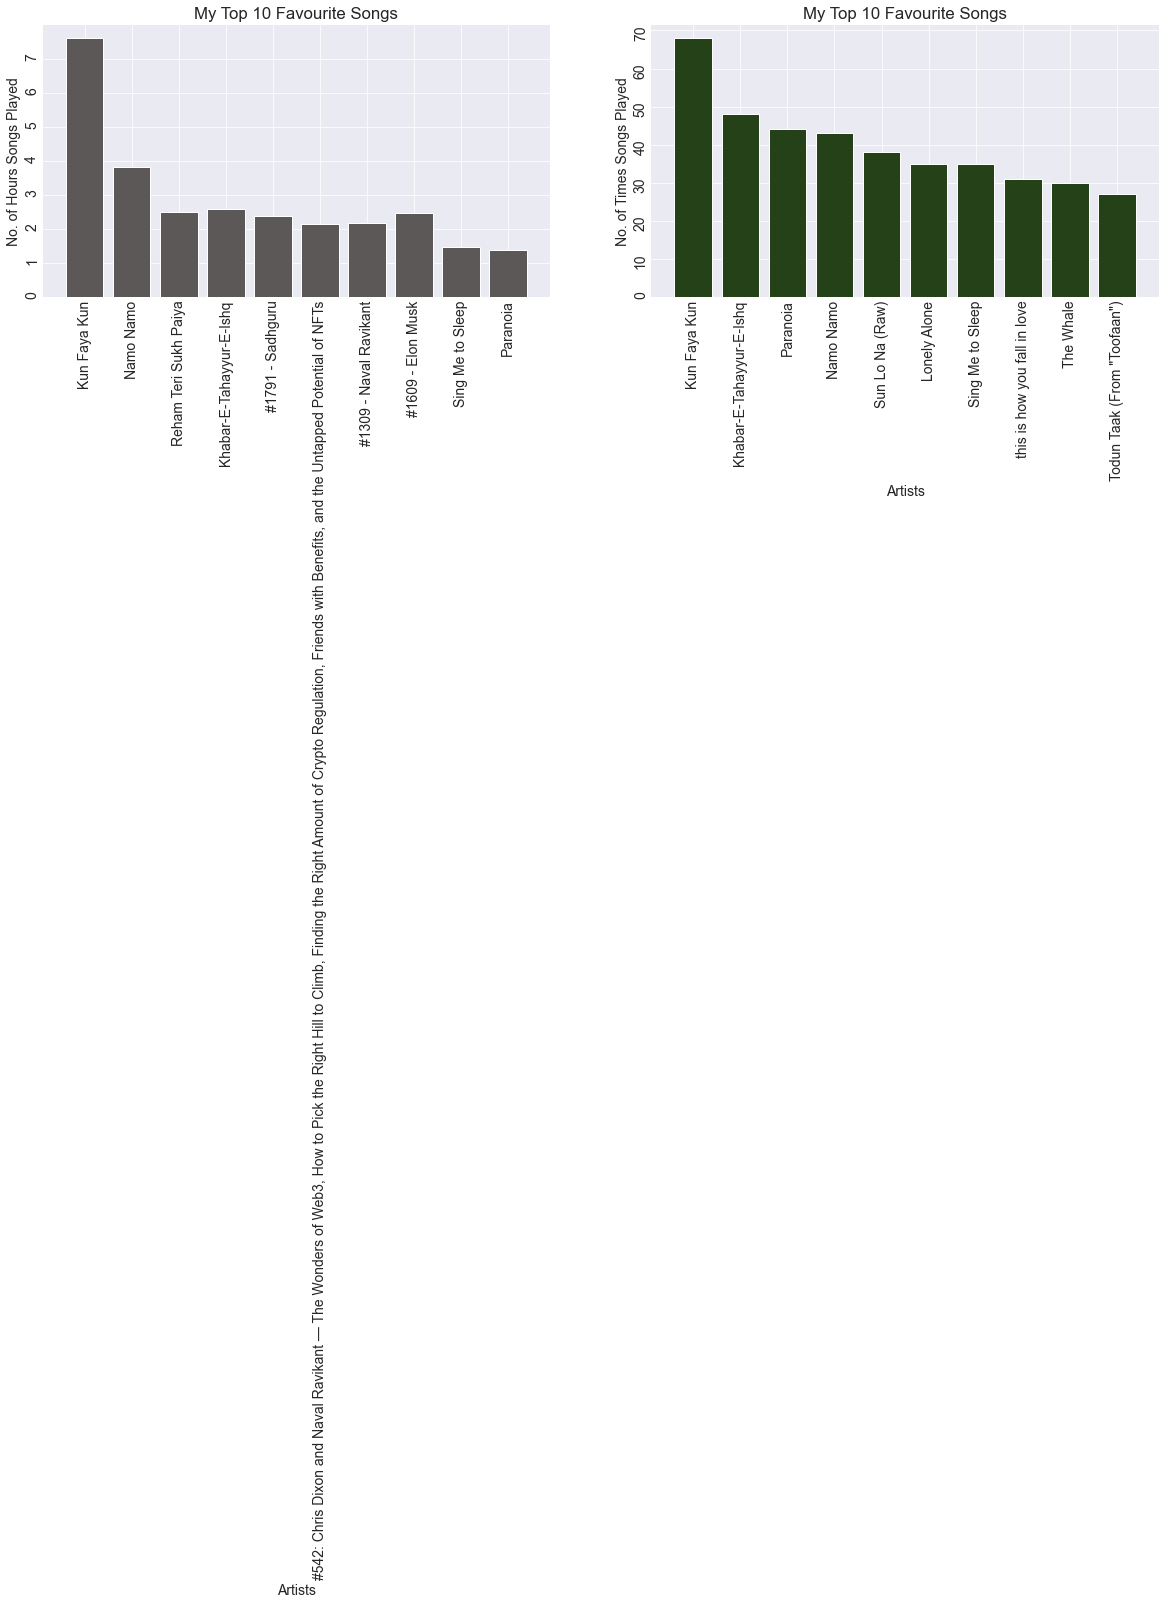

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_songs_time.head(10).index,top_10_songs_time["ListeningTime(Hours)"].head(10), color="#5C5858")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);


# Setting up our second graph
ax2.bar(top_10_songs_count.head(10).index,top_10_songs_count["Count"].head(10), color="#254117")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);


# Song Tracks Exploration

In [46]:
df.columns

Index(['artistName', 'trackName', 'playTime', 'year', 'month', 'day',
       'weekday', 'time', 'hour', 'day-name', 'Count', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

In [47]:
#percentage of my unique songs 

unique_songs=df["trackName"].nunique()
total_songs=df["trackName"].count()
percent_of_unique_songs=unique_songs/total_songs*100
print(percent_of_unique_songs)

40.71330589849108


[1484 2161]


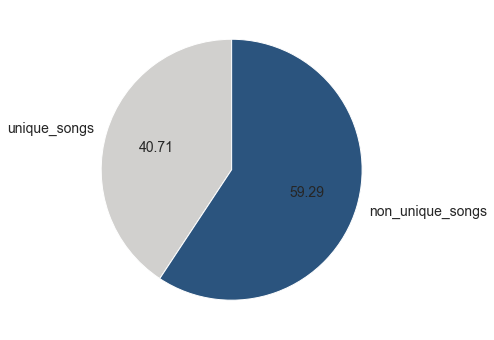

In [48]:

unique_songs_list=np.array([unique_songs,total_songs-unique_songs])
print(unique_songs_list)
fig,ax=plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list,labels=["unique_songs","non_unique_songs"],autopct='%.2f',colors=["#D1D0CE", "#2B547E"],startangle=90)
plt.title="Unique Songs Percentage";



# Day wise usage Exploration

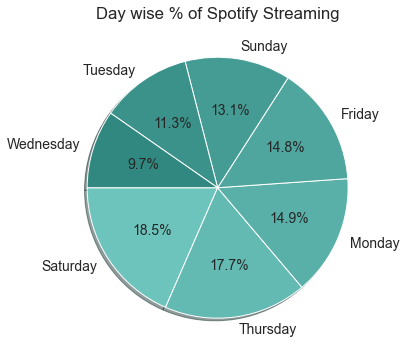

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(df["day-name"].value_counts(), labels=df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True,colors=["#6DC4BC","#63BAB2","#59B0A8","#4FA69E","#459C94","#3B928A","#318880","#77CEC6"]);
ax.set(title="Day wise % of Spotify Streaming");

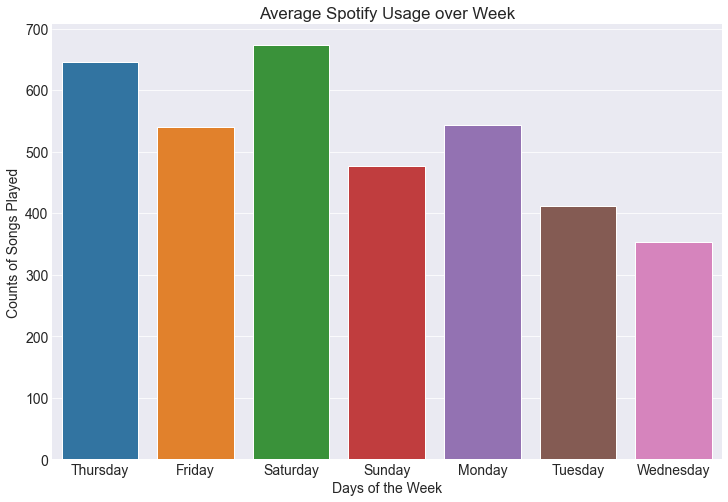

In [50]:
#countplot -> my spotify usage over weeks
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.countplot(x=df["day-name"])
plt.xticks(rotation=0);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

In [51]:
# hours spent on spotify

time_spent_hours = df["ListeningTime(Hours)"].sum() # Summation of all 
time_spent_hours

158.36200000000002

In [52]:
#percentage of usage distribution on weekdays vs weekends

df_1=df.copy()
df_1["is_weekend"]=df_1["day-name"].isin(["Saturday","Sunday"])
weekday_vs_weekend=df_1.groupby(["is_weekend"])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,2495
True,1150


In [53]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,2495,68.449931
True,1150,31.550069


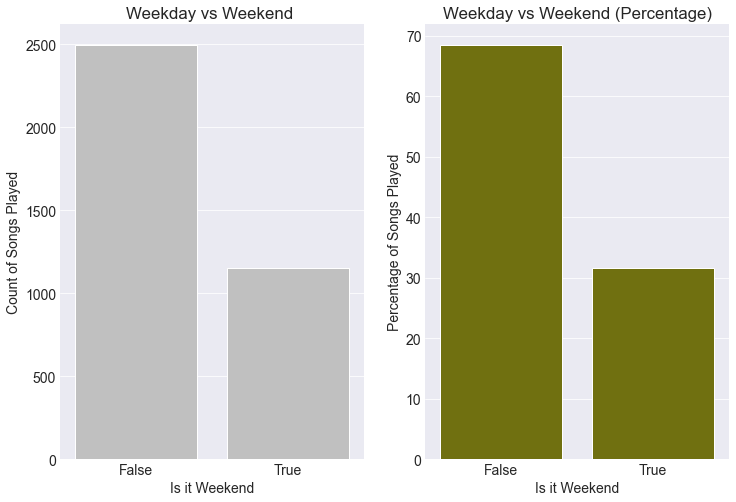

In [54]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1=sns.barplot(data=weekday_vs_weekend,x=["False","True"],y="Count",ax=ax1,color="silver")
ax1.set(title="Weekday vs Weekend ",xlabel="Is it Weekend",ylabel="Count of Songs Played")


ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");

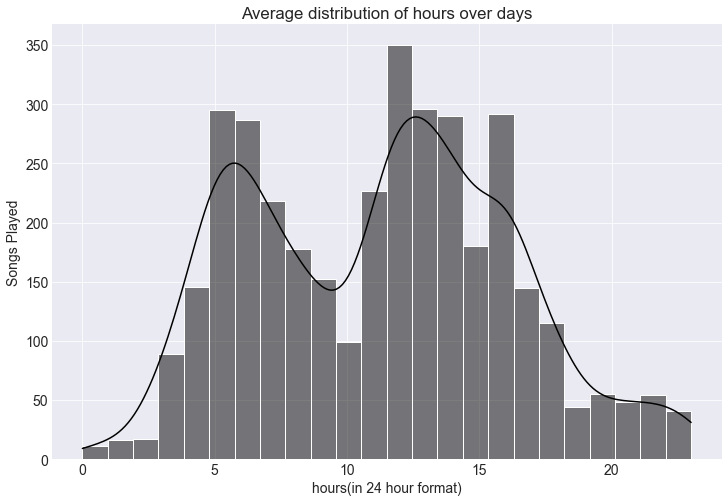

In [55]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.histplot(data=df["hour"],bins=24,kde=True,color="black")
ax.set(title="Average distribution of hours over days",xlabel="hours(in 24 hour format)",ylabel="Songs Played");

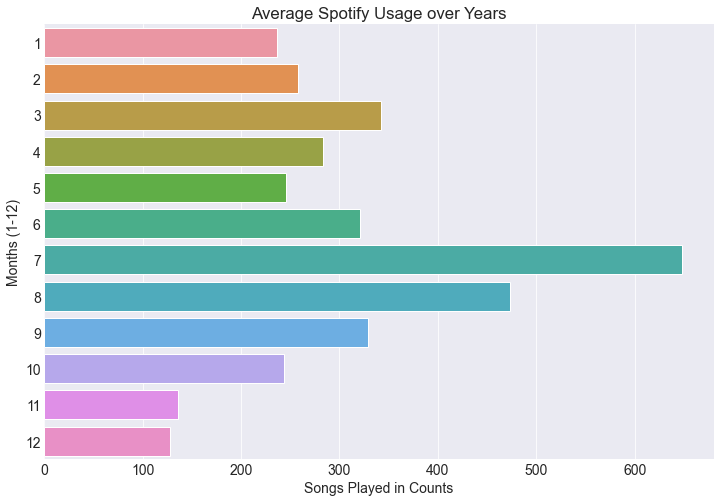

In [56]:
#average usage in a year
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.countplot(y=df["month"],ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

used spotify the most in june ,july

In [57]:
# How many hours did I spent on Spotify Streaming since last year

time_spent_hours =df["ListeningTime(Hours)"].sum() # Summation of all 
time_spent_hours

158.36200000000002

In [58]:
#actual usage in percentage compared to to the total time possible?

date_df = df["playTime"] # Making a new dataset of time only
date_df

0      2021-07-08 14:36:00
1      2021-07-09 03:06:00
2      2021-07-09 03:06:00
3      2021-07-09 03:09:00
4      2021-07-09 04:21:00
               ...        
3640   2022-07-08 15:46:00
3641   2022-07-08 15:48:00
3642   2022-07-08 15:49:00
3643   2022-07-08 15:52:00
3644   2022-07-09 07:26:00
Name: playTime, Length: 3645, dtype: datetime64[ns]

In [59]:
date_df.shape

(3645,)

In [60]:
#subtracting the time, from the start time (when I logged-in to use my spotify for the first time) 
#to the end time (The last time I used Spotify as per the dataset.
#Then we divided that with np.timedelta64 function to convert and calculate the time into days


time_difference=(date_df.iloc[2580]-date_df.iloc[0]) / np.timedelta64(1,"D")
time_difference

255.95416666666668

In [61]:
#multipling it with 24 to convert it into hours

time_differnce_hours=time_difference*24
time_differnce_hours

6142.900000000001

In [62]:
#percentage of total time spent science i started using spotify

percent_time_spent=time_spent_hours/time_differnce_hours*100
percent_time_spent.round(3)

2.578

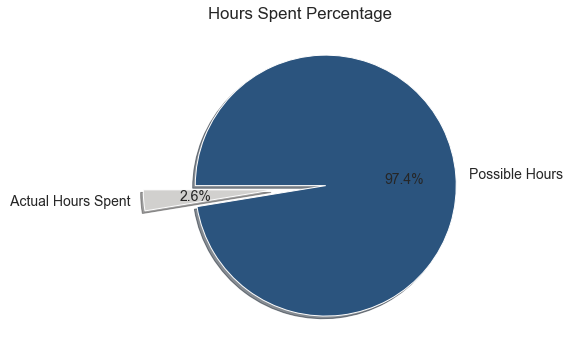

In [63]:
hours_spent_list=np.array([time_spent_hours, time_differnce_hours-time_spent_hours])
hours_spent_list_labels = [" Actual Hours Spent", "Possible Hours"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(hours_spent_list, labels= hours_spent_list_labels, autopct='%1.1f%%', colors=["#D1D0CE", "#2B547E"], explode=[0.2,0.2], startangle=180, shadow = True);
ax.set(title="Hours Spent Percentage");

In [64]:
#the average numbers of songs I played daily
total_songs=df["trackName"].count()
total_songs

3645

In [65]:
time_difference

255.95416666666668

In [66]:
average_songs_played_daily=total_songs/time_difference
average_songs_played_daily.round()

14.0

In [67]:
# know about the days when I played maximum numbers of songs in a day.

df["date"]=df["playTime"].dt.date

In [68]:
most_songs=df.groupby(["date"])[["Count"]].sum().sort_values(by="Count",ascending=False)
most_songs.head(10)

,Count
date,
2021-07-10,162
2022-04-30,110
2021-07-09,96
2021-08-26,88
2022-03-07,86
2022-02-10,74
2022-06-16,73
2021-08-25,68
2022-03-13,64


In [69]:
most_songs.tail(10)

,Count
date,
2021-12-25,1
2022-01-01,1
2022-01-02,1
2022-02-09,1
2022-03-06,1
2022-03-10,1
2022-03-29,1
2022-04-15,1
2022-05-02,1


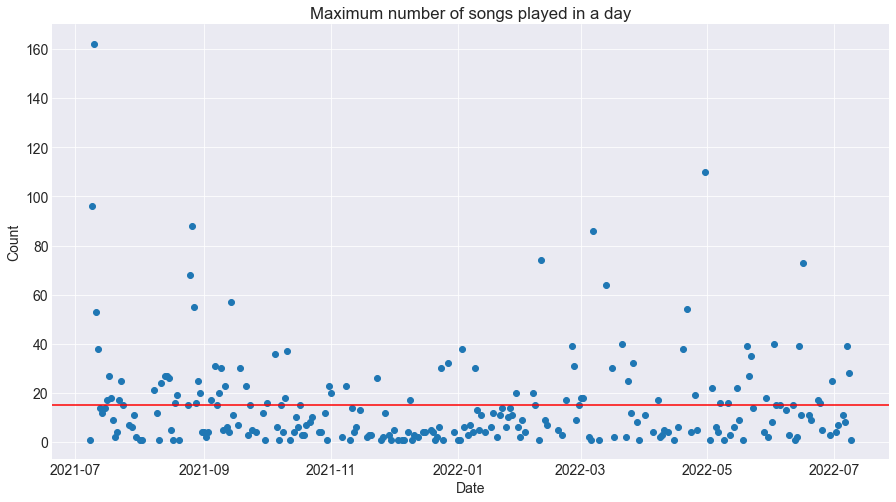

In [70]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

In [71]:
# Favourite Artist playlist for the user, based on his daily usage

my_fav_artist_playlist=df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist

,,Count
artistName,trackName,
A.R. Rahman,Kun Faya Kun,68
Ali Sethi,Khabar-E-Tahayyur-E-Ishq,48
Kyle Olthoff,Paranoia,44
Amit Trivedi,Namo Namo,43
Suzonn,Sun Lo Na (Raw),38
...,...,...
Rob Bailey & The Hustle Standard,Beast,7
Alan Walker,Ignite,7
Clean Bandit,Symphony (feat. Zara Larsson),7


In [72]:
most_songs=df.groupby(["trackName"])[["Count"]].sum().sort_values(by="Count",ascending=False)
most_songs.head(10)

,Count
trackName,
Kun Faya Kun,68
Khabar-E-Tahayyur-E-Ishq,48
Paranoia,44
Namo Namo,43
Sun Lo Na (Raw),38
Lonely Alone,35
Sing Me to Sleep,35
this is how you fall in love,31
The Whale,30


In [ ]:
#My usage based on the daily hours.
#My usage based on the daily days over week. 
#The heatmap would show at what time of what day I usually listen more songs

active_usage = df.groupby(['hour', 'day-name'])['artistName'].size().reset_index()
active_usage_pivot = active_usage.pivot("hour", 'day-name', 'artistName')
active_usage_pivot.head()

In [ ]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");

In [ ]:
#Who are my favourite 100 Artist ? Make a word cloud to show them.
#Here we want to make a list of my favourite 100 artist based on my daily usage. 
#Further we want to show the generated list in a word cloud for better visualisation.

fav_artist=df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(10)


In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

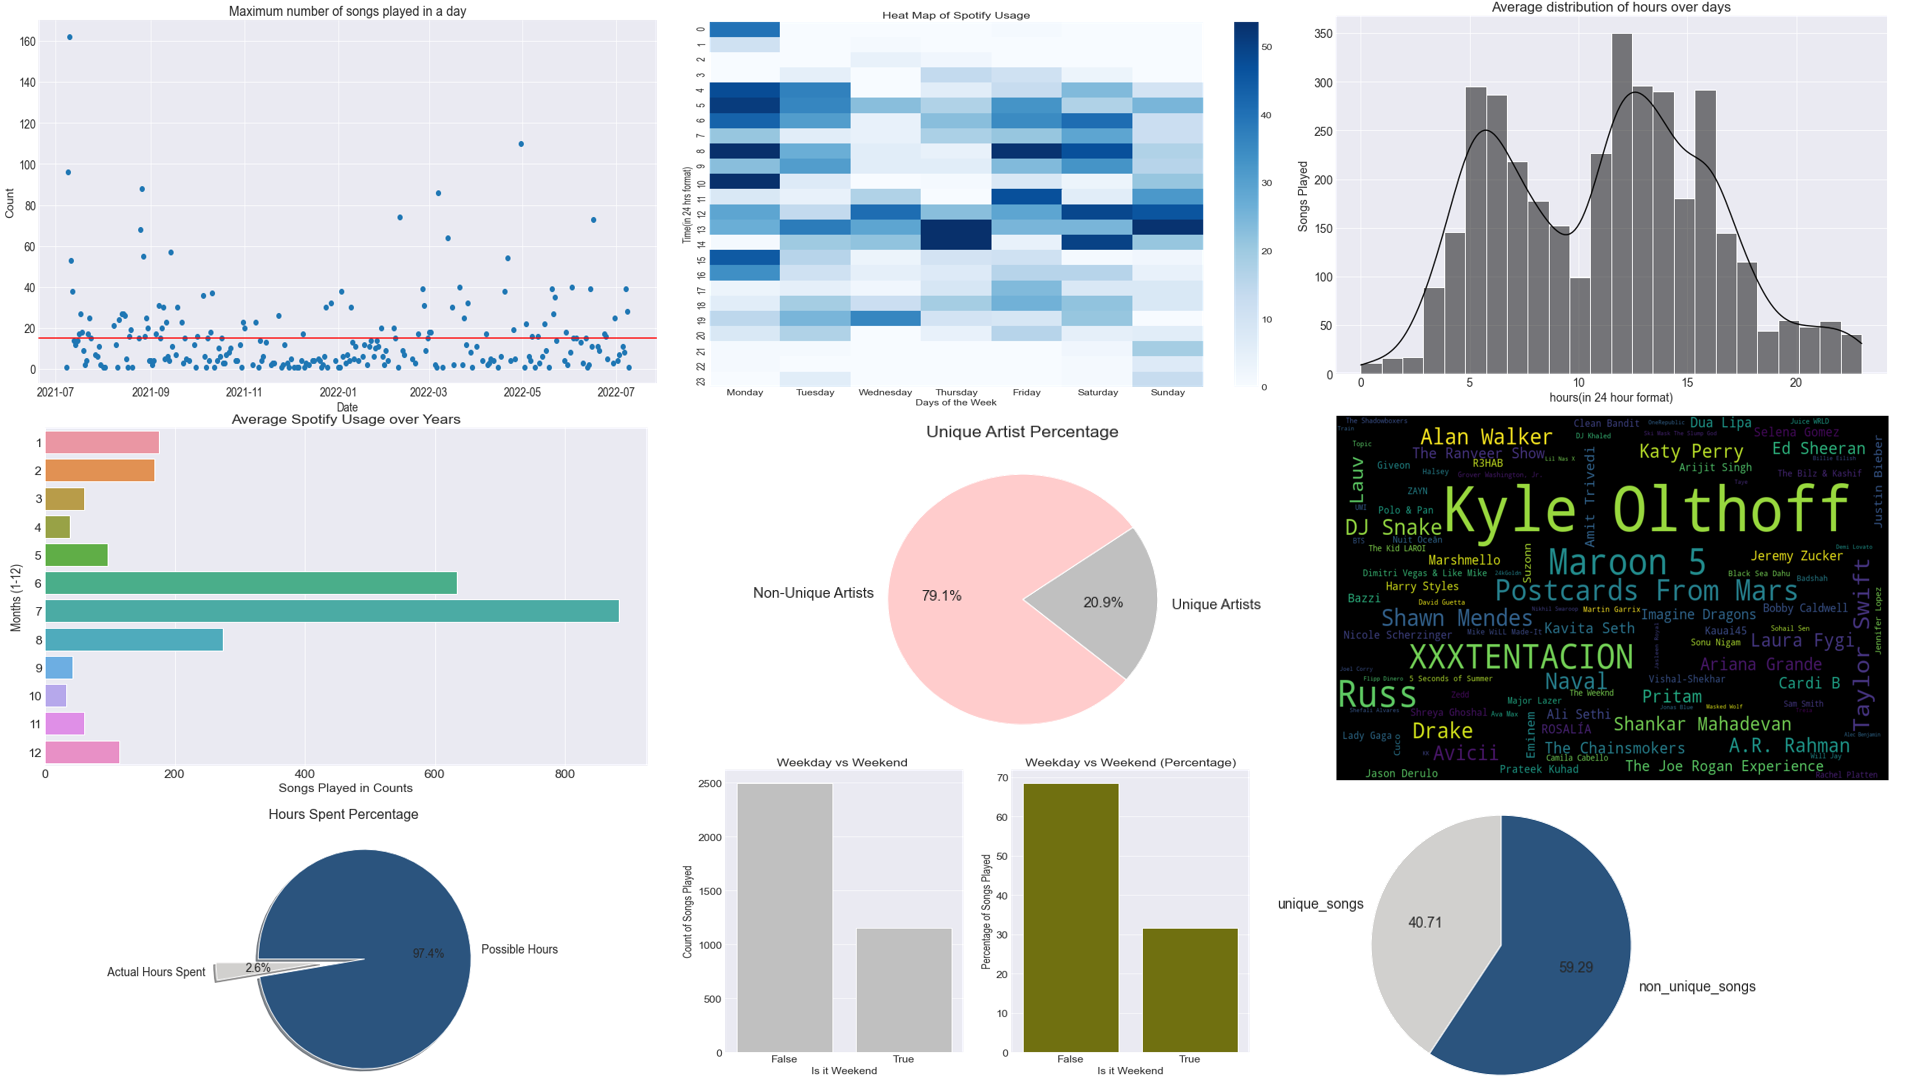

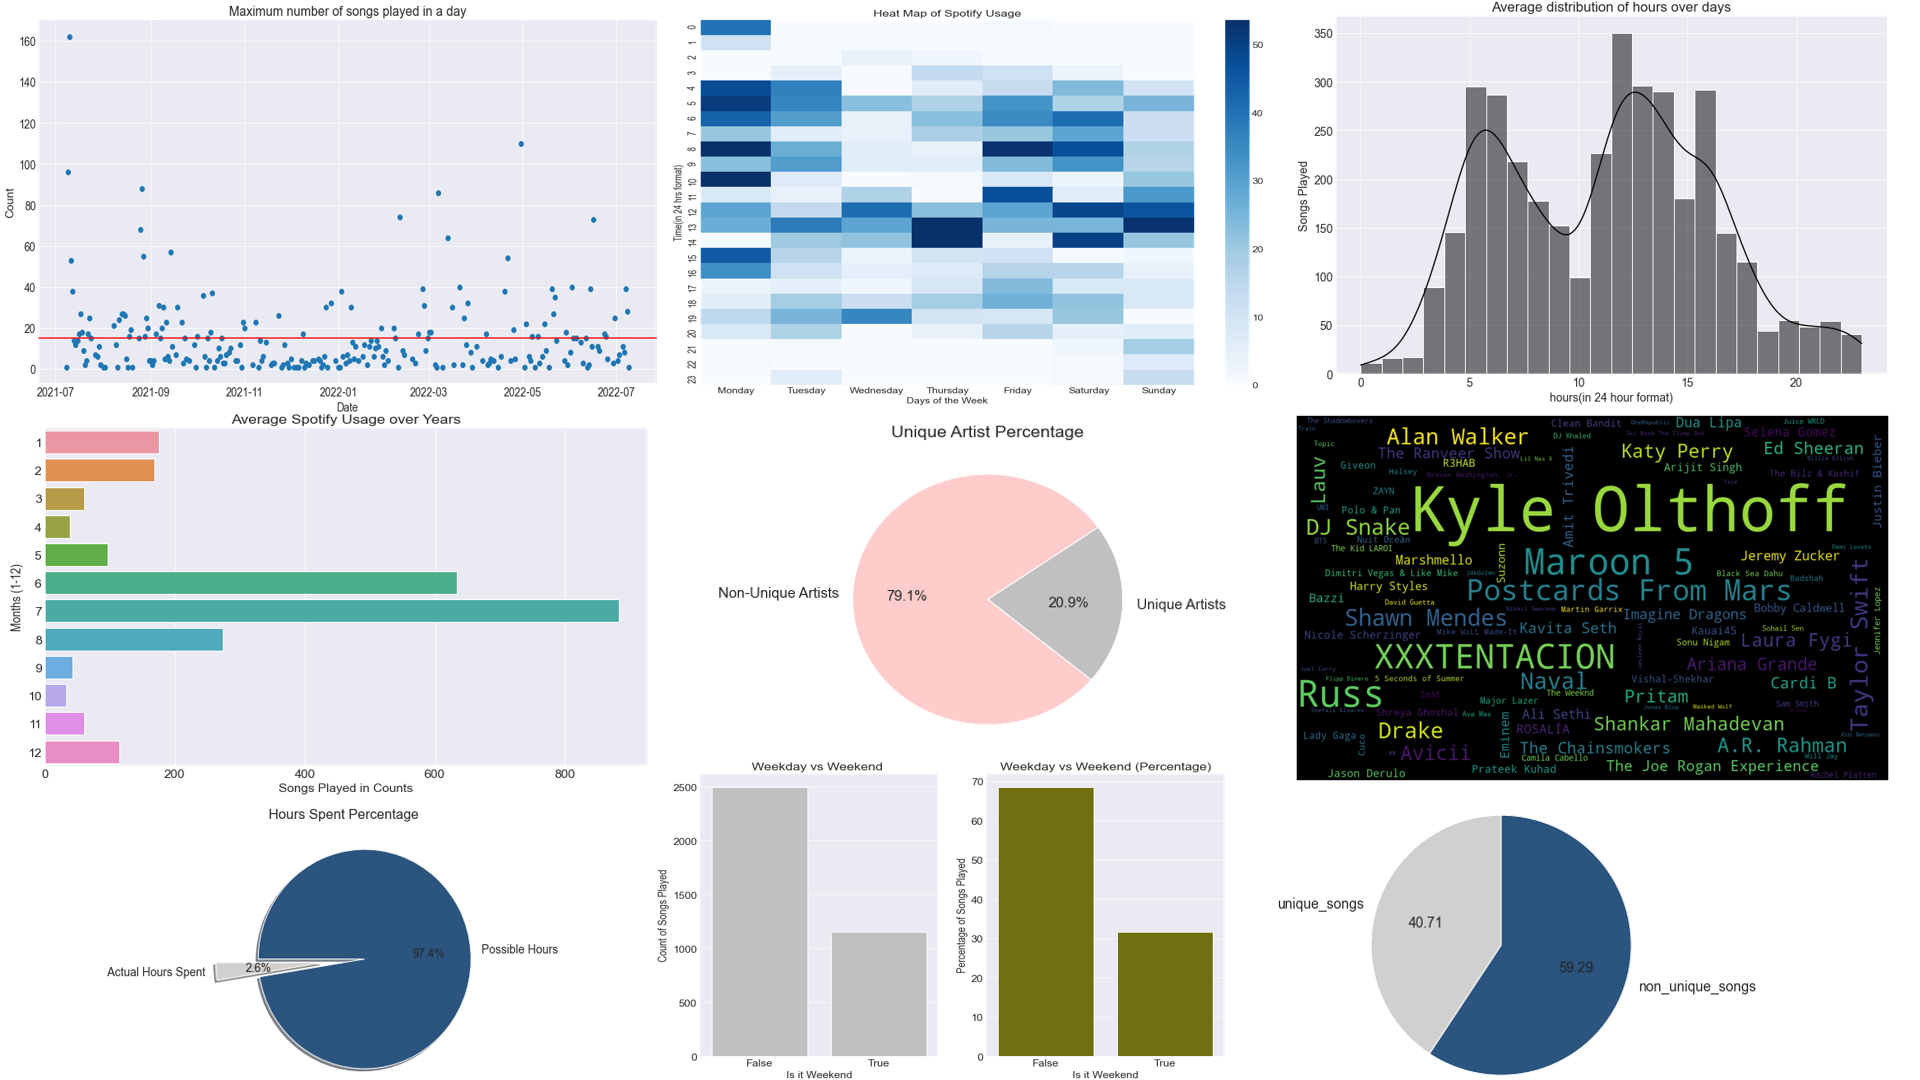